In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import sqlite3

In [ ]:
# created database connection

db_path='/content/drive/MyDrive/inventory.db'
conn = sqlite3.connect(db_path)
tables = pd.read_sql_query("select name from sqlite_master where type='table'", conn)

In [ ]:
tables

,name
0,begin_inventory
1,end_inventory
2,purchases
3,purchase_prices
4,sales
5,vendor_invoice
6,vendor_sales_summary


In [ ]:
count=pd.read_sql('select count (*) from purchases', conn)
count

,count (*)
0,2372474


In [ ]:
for table in tables['name']:
    print('-'*50, f'{table}','-'*50)
    print('Count of records: ', pd.read_sql(f'select count(*) as count from {table}', conn)['count'].values[0])
    display(pd.read_sql(f'select * from {table} limit 5', conn))


-------------------------------------------------- begin_inventory --------------------------------------------------
Count of records:  206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


-------------------------------------------------- end_inventory --------------------------------------------------
Count of records:  224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


-------------------------------------------------- purchases --------------------------------------------------
Count of records:  2372474


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


-------------------------------------------------- purchase_prices --------------------------------------------------
Count of records:  12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


-------------------------------------------------- sales --------------------------------------------------
Count of records:  12825363


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


-------------------------------------------------- vendor_invoice --------------------------------------------------
Count of records:  5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


-------------------------------------------------- vendor_sales_summary --------------------------------------------------
Count of records:  10514


,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,Volumes,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,145080,3811251.60,142049,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,1750.0,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,164038,3804041.22,160247,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,1750.0,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,187407,3418303.68,187140,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,1750.0,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,201682,3261197.94,200412,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,1750.0,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,138109,3023206.01,135838,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,1750.0,28.412764,0.983556,1.396897


In [ ]:
purchase_prices=pd.read_sql("select * from purchases where VendorNumber=4466", conn)
purchase_prices

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
1,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
2,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
3,38_GOULCREST_5215,38,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-07,2024-01-19,2024-02-26,9.41,6,56.46,1
4,59_CLAETHORPES_5215,59,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.41,6,56.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,81_PEMBROKE_5215,81,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-29,2025-01-04,2025-02-10,9.41,6,56.46,1
2188,62_KILMARNOCK_5255,62,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.35,5,46.75,1
2189,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.41,5,47.05,1
2190,6_GOULCREST_5215,6,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-31,2025-01-04,2025-02-10,9.41,6,56.46,1


In [ ]:
purchase_prices = pd.read_sql_query("select * from purchase_prices where VendorNumber=4466", conn)
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [ ]:
purchases = pd.read_sql_query("select * from purchases where VendorNumber=4466", conn)
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
1,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
2,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
3,38_GOULCREST_5215,38,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-07,2024-01-19,2024-02-26,9.41,6,56.46,1
4,59_CLAETHORPES_5215,59,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.41,6,56.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,81_PEMBROKE_5215,81,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-29,2025-01-04,2025-02-10,9.41,6,56.46,1
2188,62_KILMARNOCK_5255,62,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.35,5,46.75,1
2189,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.41,5,47.05,1
2190,6_GOULCREST_5215,6,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-31,2025-01-04,2025-02-10,9.41,6,56.46,1


In [ ]:
vendor_invoice = pd.read_sql_query("select * from vendor_invoice where VendorNUmber=4466", conn)
vendor_invoice

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-19,8207,2023-12-27,2024-02-26,335,3142.33,16.97,None
2,4466,AMERICAN VINTAGE BEVERAGE,2024-01-18,8307,2024-01-03,2024-02-18,41,383.35,1.99,None
3,4466,AMERICAN VINTAGE BEVERAGE,2024-01-27,8469,2024-01-14,2024-03-11,72,673.20,3.30,None
4,4466,AMERICAN VINTAGE BEVERAGE,2024-02-04,8532,2024-01-19,2024-03-15,79,740.21,3.48,None
5,4466,AMERICAN VINTAGE BEVERAGE,2024-02-09,8604,2024-01-24,2024-03-15,347,3261.37,17.61,None
6,4466,AMERICAN VINTAGE BEVERAGE,2024-02-17,8793,2024-02-05,2024-04-02,72,675.36,3.17,None
7,4466,AMERICAN VINTAGE BEVERAGE,2024-03-01,8892,2024-02-12,2024-03-28,117,1096.05,5.15,None
8,4466,AMERICAN VINTAGE BEVERAGE,2024-03-07,8995,2024-02-19,2024-04-02,129,1209.27,5.44,None
9,4466,AMERICAN VINTAGE BEVERAGE,2024-03-12,9033,2024-02-22,2024-04-16,147,1377.87,6.61,None


In [ ]:
sales= pd.read_sql_query("select * from sales where VendorNo=4466", conn)
sales


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
1,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-12,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
2,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-15,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
3,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
4,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9448,9_BLACKPOOL_5215,9,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-12-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9449,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-02,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9450,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9451,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE


In [ ]:
purchases.groupby(['Brand', 'PurchasePrice'])[['Quantity','Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
3140,11.19,4640,51921.60
5215,9.41,4923,46325.43
5255,9.35,6215,58110.25


In [ ]:
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [ ]:
def check_size():
  if (vendor_invoice['PONumber'].nunique()) and (vendor_invoice.shape[0]):
    return True
  else:
    return False
check_size()

True

In [ ]:
vendor_invoice.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

In [ ]:
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
1,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-12,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
2,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-15,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
3,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
4,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9448,9_BLACKPOOL_5215,9,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-12-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9449,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-02,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9450,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9451,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE


In [ ]:
sales.groupby('Brand')[['SalesDollars','SalesPrice','SalesQuantity']].sum()

,SalesDollars,SalesPrice,SalesQuantity
Brand,,,
3140,50531.10,30071.85,3890
5215,60416.49,41542.02,4651
5255,79187.04,51180.60,6096




*   The purchases table contains actual purchase data, including the date of purchase, products (brands) purchased by vendors, the amount paid (in dollars), and the quantity purchased.
*   The purchase price column is derived from the purchase_price table, which provides product-wise actual and purchase prices. The comibantion of vendor and branch in unique in this table.
*   The vendor_invoice table aggregates data from the purchases tbale, summarizing quantity and dollar amounts, along with an additional column for freight.
This table maintains uniqueness based on vendor snd PO number.
*   The sales table captures actual sales transactions, detailing the brands purchased by vendors, the qunatity sold, the selling price, and the revenue earned.
_____________________________________________________________

As the data we need for analysis is distributed in different tables, we need to create a summary table containing:
*  purchase transactions made by vendors
*  sales transaction date
*  freight costs of each vendor
*  actual product prices from vendors



In [ ]:
freight_summary = pd.read_sql_query(""" select VendorNumber, SUM(Freight) as FreightCost From vendor_invoice
Group By VendorNumber""", conn)
freight_summary

,VendorNumber,FreightCost
0,2,27.08
1,54,0.48
2,60,367.52
3,105,62.39
4,200,6.19
...,...,...
121,98450,856.02
122,99166,130.09
123,172662,178.34
124,173357,202.50


In [ ]:
pd.read_sql_query(""" select p.VendorNumber,
p.VendorName,
p.Brand,
p.PurchasePrice,
pp.Volume,
pp.Price as Actual_Price,
SUM(p.Quantity) as TotalPurchaseQuantity,
SUM(p.Dollars) as TotalPurchaseDollars
FROM purchases p
JOIN purchase_prices pp
ON p.Brand = pp.Brand
where p.PurchasePrice>0
Group By p.VendorNumber, p.VendorName, p.Brand
ORDER By TotalPurchaseDollars""", conn)

,VendorNumber,VendorName,Brand,PurchasePrice,Volume,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollars
0,7245,PROXIMO SPIRITS INC.,3065,0.71,50,0.99,1,0.71
1,3960,DIAGEO NORTH AMERICA INC,6127,1.47,200,1.99,1,1.47
2,3924,HEAVEN HILL DISTILLERIES,9123,0.74,50,0.99,2,1.48
3,8004,SAZERAC CO INC,5683,0.39,50,0.49,6,2.34
4,9815,WINE GROUP INC,8527,1.32,750,4.99,2,2.64
...,...,...,...,...,...,...,...,...
10687,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750,29.99,138109,3023206.01
10688,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,201682,3261197.94
10689,17035,PERNOD RICARD USA,8068,18.24,1750,24.99,187407,3418303.68
10690,4425,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,164038,3804041.22


In [ ]:
sales.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [ ]:
pd.read_sql_query("""SELECT
VendorNo,
Brand,
SUM(SalesDollars) as TotalSalesDollars,
SUM(SalesPrice) as TotalSalesPrice,
SUM(SalesQuantity) as TotalSalesQuantity,
SUM(ExciseTax) as TotalExciseTax
FROM sales
GROUP BY VendorNo, Brand
ORDER BY TotalSalesDollars""", conn
)

,VendorNo,Brand,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax
0,8004,5287,9.800000e-01,0.98,2,0.10
1,9206,2773,9.900000e-01,0.99,1,0.05
2,3252,3933,1.980000e+00,0.99,2,0.10
3,3924,9123,1.980000e+00,0.99,2,0.10
4,10050,3623,1.980000e+00,1.98,2,0.10
...,...,...,...,...,...,...
11267,3960,3545,4.223108e+06,545778.28,135838,249587.83
11268,3960,4261,4.475973e+06,420050.01,200412,368242.80
11269,17035,8068,4.538121e+06,461140.15,187140,343854.07
11270,4425,3405,4.819073e+06,561512.37,160247,294438.66


In [ ]:
vendor_sales_summary = pd.read_sql_query("""with FreightSummary as (
  select VendorNumber, SUM(Freight) as FreightCost From vendor_invoice
Group By VendorNumber
),
purchaseSummary as ( select p.VendorNumber,
p.VendorName,
p.Brand,
p.Description,
p.PurchasePrice,
pp.Volume,
pp.Price as Actual_Price,
SUM(p.Quantity) as TotalPurchaseQuantity,
SUM(p.Dollars) as TotalPurchaseDollars
FROM purchases p
JOIN purchase_prices pp
ON p.Brand = pp.Brand
where p.PurchasePrice>0
Group By p.VendorNumber, p.VendorName, p.Brand
ORDER By TotalPurchaseDollars

), salesSummary as (SELECT
VendorNo,
Brand,
SUM(SalesDollars) as TotalSalesDollars,
SUM(SalesPrice) as TotalSalesPrice,
SUM(SalesQuantity) as TotalSalesQuantity,
SUM(ExciseTax) as TotalExciseTax
FROM sales
GROUP BY VendorNo, Brand)
select
ps.VendorNumber,
ps.VendorName,
ps.Brand,
ps.Description,
ps.PurchasePrice,
ps.Actual_Price,
ps.Volume,
ps.TotalPurchaseQuantity,
ps.TotalPurchaseDollars,
ss.TotalSalesQuantity,
ss.TotalSalesDollars,
ss.TotalSalesPrice,
ss.TotalExciseTax,
fs.FreightCost
from purchaseSummary ps
join salesSummary ss on ps.VendorNumber=ss.VendorNo and ps.Brand=ss.Brand
left join FreightSummary fs on ps.VendorNumber=fs.VendorNumber
order by ps.TotalPurchaseDollars desc
""", conn)

In [ ]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,142049,5.101920e+06,672819.31,260999.20,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,160247,4.819073e+06,561512.37,294438.66,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,187140,4.538121e+06,461140.15,343854.07,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,200412,4.475973e+06,420050.01,368242.80,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,135838,4.223108e+06,545778.28,249587.83,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10509,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,5,1.595000e+01,10.96,0.55,27100.41
10510,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,134,6.566000e+01,1.47,7.04,50293.62
10511,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,2,1.980000e+00,0.99,0.10,14069.87
10512,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,72,1.432800e+02,77.61,15.12,257032.07


This query generates a vendor-wise sales and purchase summary which is valuable for:
#### Performance Optimization:
* The query involves heavy joins and aggregations on large dataset like sales and purchases.
*  Storing the pre-aggregated results avoids repeated expensive compuatations.
* Helping in analyzing sales, purchases and pricing different vendors and brands.
* Future Benefits of Storing this data for faster Dashboarding & Reporting.
* Instead of running expensive queries each time, dashboard can fetch the data quickly from vendor_sales_summary.

In [ ]:
vendor_sales_summary.dtypes

,0
VendorNumber,int64
VendorName,object
Brand,int64
Description,object
PurchasePrice,float64
Actual_Price,float64
Volume,object
TotalPurchaseQuantity,int64
TotalPurchaseDollars,float64
TotalSalesQuantity,int64


In [ ]:
vendor_sales_summary.isnull().sum()

,0
VendorNumber,0
VendorName,0
Brand,0
Description,0
PurchasePrice,0
Actual_Price,0
Volume,0
TotalPurchaseQuantity,0
TotalPurchaseDollars,0
TotalSalesQuantity,0


In [ ]:
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP          ', 'MARTIGNETTI COMPANIES',
       'PERNOD RICARD USA          ', 'DIAGEO NORTH AMERICA INC   ',
       'BACARDI USA INC            ', 'JIM BEAM BRANDS COMPANY    ',
       'MAJESTIC FINE WINES        ', 'ULTRA BEVERAGE COMPANY LLP ',
       'STOLI GROUP,(USA) LLC      ', 'PROXIMO SPIRITS INC.       ',
       'MOET HENNESSY USA INC      ', 'CAMPARI AMERICA            ',
       'SAZERAC CO INC             ', 'CONSTELLATION BRANDS INC   ',
       'M S WALKER INC             ', 'SAZERAC NORTH AMERICA INC. ',
       'PALM BAY INTERNATIONAL INC ', 'REMY COINTREAU USA INC     ',
       'SIDNEY FRANK IMPORTING CO  ', 'E & J GALLO WINERY         ',
       'WILLIAM GRANT & SONS INC   ', 'HEAVEN HILL DISTILLERIES   ',
       'DISARONNO INTERNATIONAL LLC', 'EDRINGTON AMERICAS         ',
       'CASTLE BRANDS CORP.        ', 'SOUTHERN WINE & SPIRITS NE ',
       'STE MICHELLE WINE ESTATES  ', 'TRINCHERO FAMILY ESTATES   ',
       'MHW LTD                    ', 'W

In [ ]:
vendor_sales_summary['Description'].unique()

array(['Jack Daniels No 7 Black', "Tito's Handmade Vodka",
       'Absolut 80 Proof', ..., 'Crown Royal Apple',
       'Concannon Glen Ellen Wh Zin', 'The Club Strawbry Margarita'],
      dtype=object)

In [ ]:
vendor_sales_summary['Volumes'] = vendor_sales_summary['Volume'].astype(float)

In [ ]:
vendor_sales_summary['VendorName']=vendor_sales_summary['VendorName'].str.strip()

In [ ]:
vendor_sales_summary['GrossProfit'] = vendor_sales_summary['TotalSalesDollars'] - vendor_sales_summary['TotalPurchaseDollars']

In [ ]:
vendor_sales_summary['GrossProfit'].min()

-52002.78000000001

In [ ]:
vendor_sales_summary['ProfitMargin'] = (vendor_sales_summary['GrossProfit'] / vendor_sales_summary['TotalSalesDollars']) * 100

In [ ]:
vendor_sales_summary['StockTurnover'] = vendor_sales_summary['TotalSalesQuantity'] / vendor_sales_summary['TotalPurchaseQuantity']

In [ ]:
vendor_sales_summary['SalestoPurchaseRatio'] = vendor_sales_summary['TotalSalesDollars'] / vendor_sales_summary['TotalPurchaseDollars']

In [ ]:
vendor_sales_summary.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Actual_Price', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'Volumes',
       'GrossProfit', 'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

In [ ]:
vendor_sales_summary.drop(['Volume'], axis=1, inplace=True)

In [ ]:
vendor_sales_summary.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Actual_Price', 'TotalPurchaseQuantity', 'TotalPurchaseDollars',
       'TotalSalesQuantity', 'TotalSalesDollars', 'TotalSalesPrice',
       'TotalExciseTax', 'FreightCost', 'Volumes', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

In [ ]:
cursor=conn.cursor()

In [ ]:
cursor.execute("""create table vendor_sales_summary (
  VendorNumber INT,
  VendorName VARCHAR(100),
  Brand INT,
  Description VARCHAR(100),
  PurchasePrice DECIMAL(10,2),
  Actual_Price DECIMAL(10,2),
  Volume,
  TotalPurchaseQuantity INT,
  TotalPurchaseDollars DECIMAL(15,2),
  TotalSalesQuantity INT,
  TotalSalesDollars DECIMAL(15,2),
  TotalSalesPrice DECIMAL(15,2),
  TotalExciseTax DECIMAL(15,2),
  FreightCost DECIMAL(15,2),
  GrossProfit DECIMAL(15,2),
  ProfitMargin DECIMAL(15,2),
  StockTurnover DECIMAL(15,2),
  SalestoPurchaseRatio DECIMAL(15,2),
  primary key (VendorNumber, Brand)
);
""")

OperationalError: table vendor_sales_summary already exists

In [ ]:
pd.read_sql_query("select * from vendor_sales_summary", conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,Volumes,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,145080,3811251.60,142049,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,1750.0,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,164038,3804041.22,160247,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,1750.0,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,187407,3418303.68,187140,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,1750.0,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,201682,3261197.94,200412,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,1750.0,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,138109,3023206.01,135838,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,1750.0,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10509,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,2,2.64,5,1.595000e+01,10.96,0.55,27100.41,13.31,750.0,83.448276,2.500000,6.041667
10510,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,6,2.34,134,6.566000e+01,1.47,7.04,50293.62,63.32,50.0,96.436186,22.333333,28.059829
10511,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,2,1.48,2,1.980000e+00,0.99,0.10,14069.87,0.50,50.0,25.252525,1.000000,1.337838
10512,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,1,1.47,72,1.432800e+02,77.61,15.12,257032.07,141.81,200.0,98.974037,72.000000,97.469388


In [ ]:
vendor_sales_summary.to_sql('vendor_sales_summary', conn, if_exists='replace', index=False)
conn.commit()

In [ ]:
table_name=pd.read_sql_query("select name from sqlite_master where type='table'", conn)
table_name

,name
0,begin_inventory
1,end_inventory
2,purchases
3,purchase_prices
4,sales
5,vendor_invoice
6,vendor_sales_summary


In [ ]:
vendor_sales=pd.read_sql_query("select * from vendor_sales_summary", conn)
vendor_sales

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,Volumes,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,145080,3811251.60,142049,5.101920e+06,672819.31,260999.20,68601.68,1750.0,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,164038,3804041.22,160247,4.819073e+06,561512.37,294438.66,144929.24,1750.0,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,187407,3418303.68,187140,4.538121e+06,461140.15,343854.07,123780.22,1750.0,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,201682,3261197.94,200412,4.475973e+06,420050.01,368242.80,257032.07,1750.0,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,138109,3023206.01,135838,4.223108e+06,545778.28,249587.83,257032.07,1750.0,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10509,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,2,2.64,5,1.595000e+01,10.96,0.55,27100.41,750.0,13.31,83.448276,2.500000,6.041667
10510,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,6,2.34,134,6.566000e+01,1.47,7.04,50293.62,50.0,63.32,96.436186,22.333333,28.059829
10511,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,2,1.48,2,1.980000e+00,0.99,0.10,14069.87,50.0,0.50,25.252525,1.000000,1.337838
10512,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,1,1.47,72,1.432800e+02,77.61,15.12,257032.07,200.0,141.81,98.974037,72.000000,97.469388


In [ ]:
vendor_sales=pd.read_sql_query("select * from vendor_sales_summary", conn)
vendor_sales

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,Volumes,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,145080,3811251.60,142049,5.101920e+06,672819.31,260999.20,68601.68,1750.0,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,164038,3804041.22,160247,4.819073e+06,561512.37,294438.66,144929.24,1750.0,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,187407,3418303.68,187140,4.538121e+06,461140.15,343854.07,123780.22,1750.0,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,201682,3261197.94,200412,4.475973e+06,420050.01,368242.80,257032.07,1750.0,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,138109,3023206.01,135838,4.223108e+06,545778.28,249587.83,257032.07,1750.0,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10509,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,2,2.64,5,1.595000e+01,10.96,0.55,27100.41,750.0,13.31,83.448276,2.500000,6.041667
10510,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,6,2.34,134,6.566000e+01,1.47,7.04,50293.62,50.0,63.32,96.436186,22.333333,28.059829
10511,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,2,1.48,2,1.980000e+00,0.99,0.10,14069.87,50.0,0.50,25.252525,1.000000,1.337838
10512,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,1,1.47,72,1.432800e+02,77.61,15.12,257032.07,200.0,141.81,98.974037,72.000000,97.469388


# Vendor Performance Analysis

### Importing all the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import scipy.stats as stats
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_sql_query("Select * from vendor_sales_summary", conn)

In [ ]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,Volumes,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,145080,3811251.60,142049,5.101920e+06,672819.31,260999.20,68601.68,1750.0,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,164038,3804041.22,160247,4.819073e+06,561512.37,294438.66,144929.24,1750.0,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,187407,3418303.68,187140,4.538121e+06,461140.15,343854.07,123780.22,1750.0,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,201682,3261197.94,200412,4.475973e+06,420050.01,368242.80,257032.07,1750.0,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,138109,3023206.01,135838,4.223108e+06,545778.28,249587.83,257032.07,1750.0,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10509,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,2,2.64,5,1.595000e+01,10.96,0.55,27100.41,750.0,13.31,83.448276,2.500000,6.041667
10510,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,6,2.34,134,6.566000e+01,1.47,7.04,50293.62,50.0,63.32,96.436186,22.333333,28.059829
10511,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,2,1.48,2,1.980000e+00,0.99,0.10,14069.87,50.0,0.50,25.252525,1.000000,1.337838
10512,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,1,1.47,72,1.432800e+02,77.61,15.12,257032.07,200.0,141.81,98.974037,72.000000,97.469388


### EDA on final table (vendor_sales_summary)

In [ ]:
## summary stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10514.0,10600.166255,18661.457769,2.000000,3924.000000,7153.000000,9552.000000,2.013590e+05
Brand,10514.0,17975.340784,12689.342924,58.000000,5716.750000,18644.000000,25465.750000,9.063100e+04
PurchasePrice,10514.0,23.409368,92.170052,0.360000,6.840000,10.450000,19.370000,4.264700e+03
Actual_Price,10514.0,34.340224,126.674964,0.490000,10.990000,15.990000,28.990000,5.799990e+03
TotalPurchaseQuantity,10514.0,3192.852007,11181.338139,1.000000,36.000000,280.500000,2028.750000,3.376600e+05
TotalPurchaseDollars,10514.0,30589.555058,124047.851341,0.710000,479.362500,3836.415000,21280.710000,3.811252e+06
TotalSalesQuantity,10514.0,3129.583317,11037.801407,1.000000,36.000000,280.000000,1985.000000,3.349390e+05
TotalSalesDollars,10514.0,42954.173834,168977.755843,1.980000,809.820000,5599.700000,29524.250000,5.101920e+06
TotalSalesPrice,10514.0,19111.958773,45264.605387,0.990000,334.890000,3020.085000,16442.477500,6.728193e+05
TotalExciseTax,10514.0,1804.263569,11065.659557,0.060000,5.382500,50.425000,436.730000,3.682428e+05


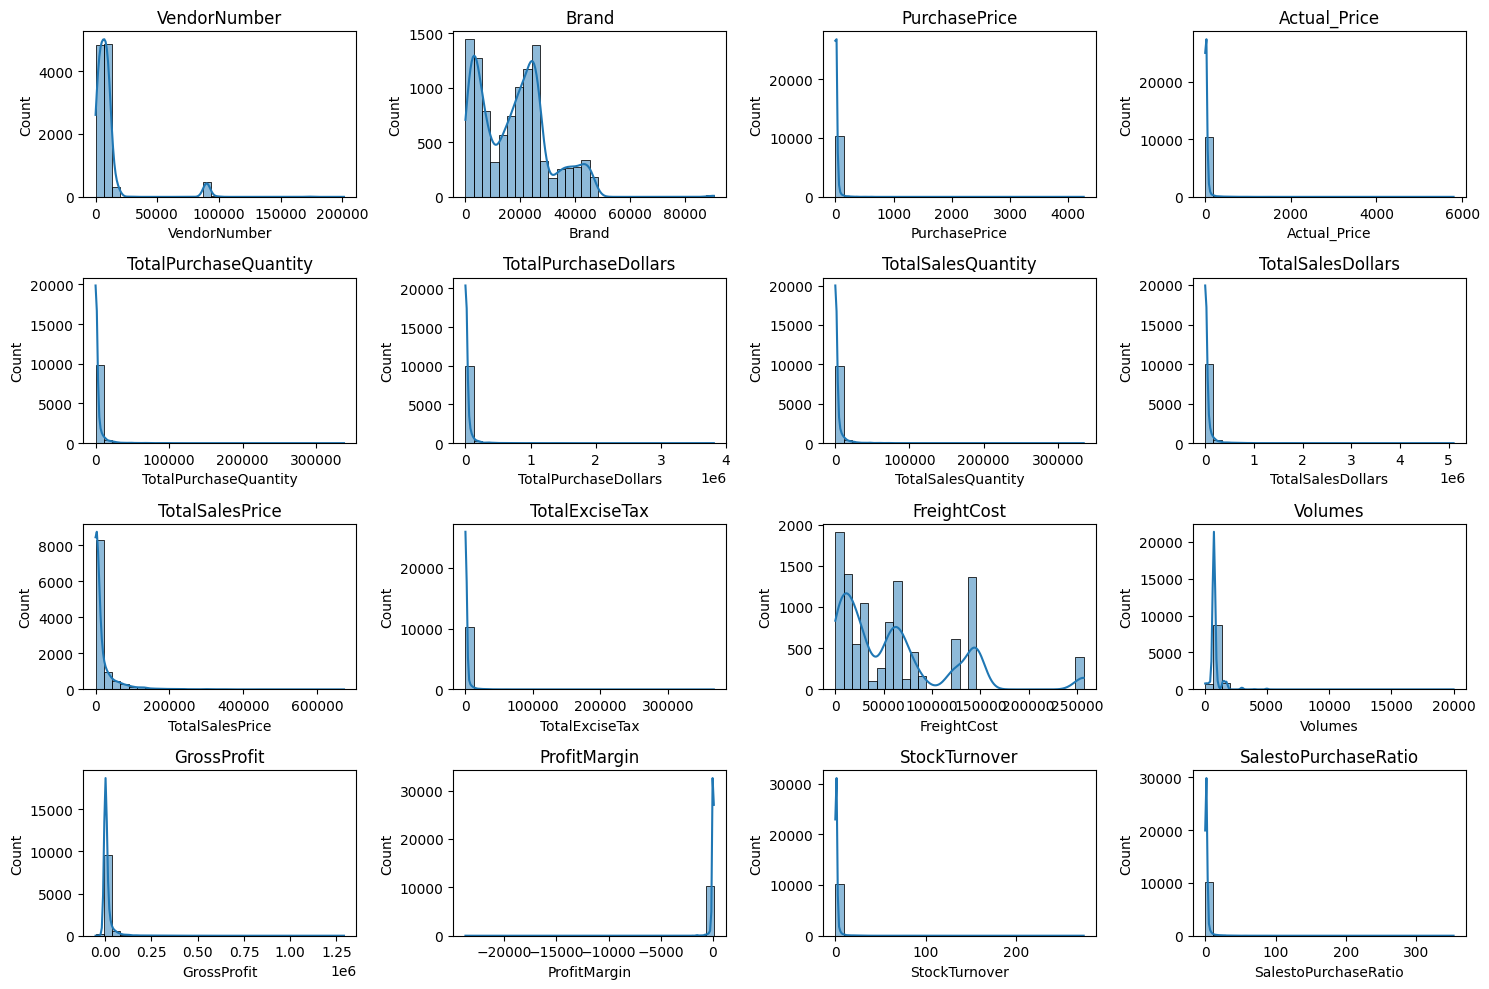

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
  plt.subplot(4,4,i+1)
  sns.histplot(df[col], kde=True, bins=30)
  plt.title(col)
plt.tight_layout()
plt.show()

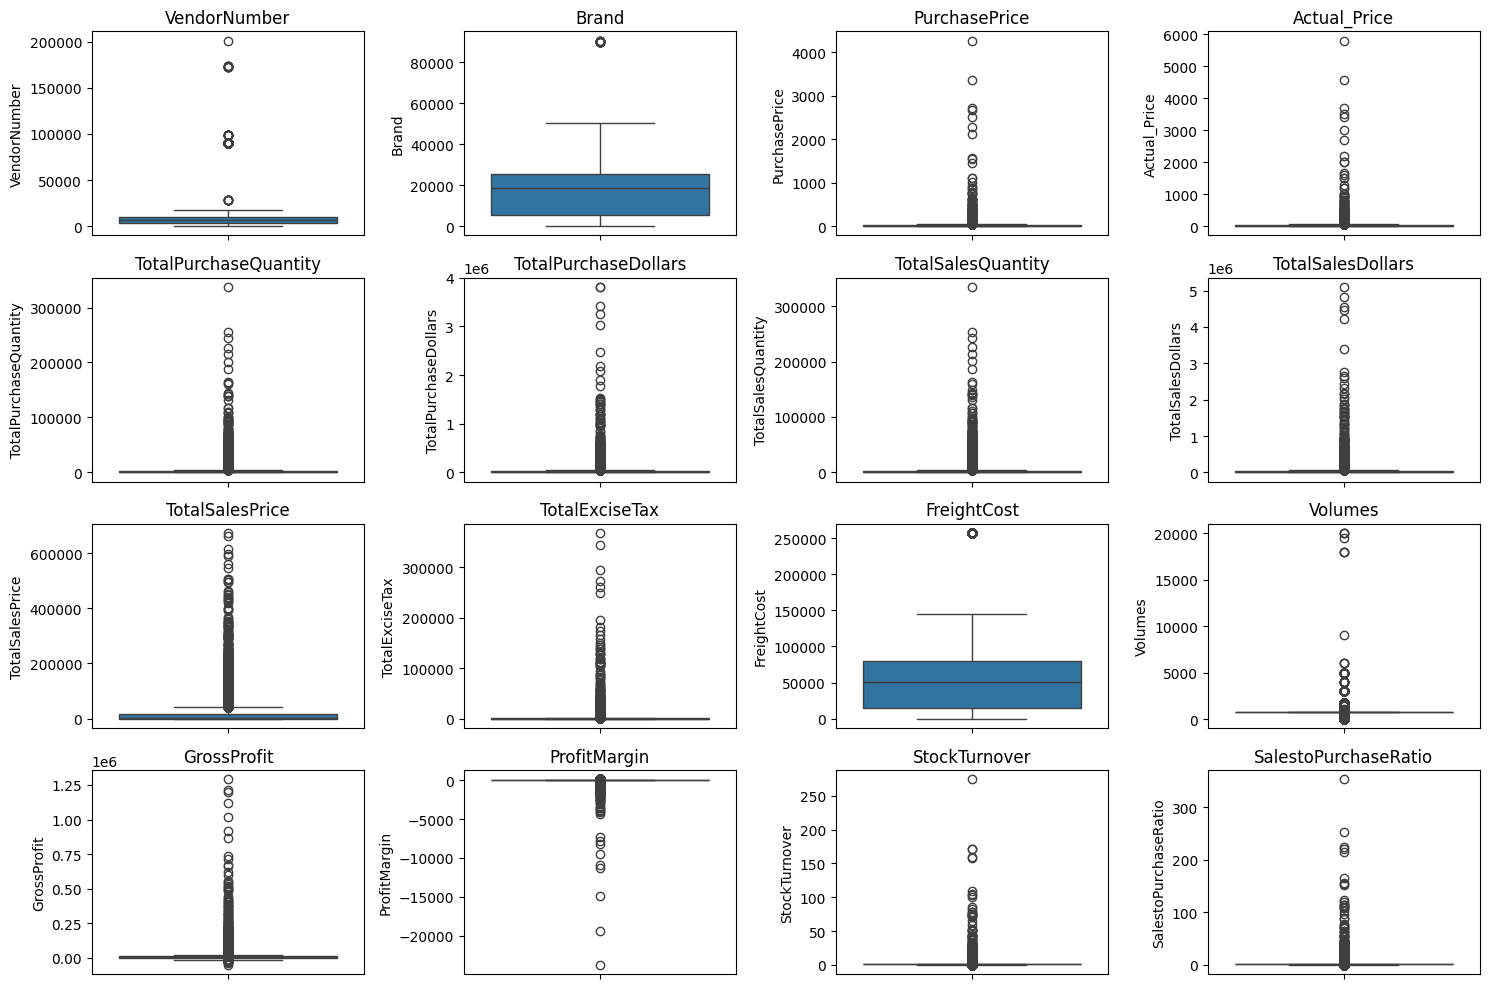

In [ ]:
# Outlier Detection with Box Plot
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
  plt.subplot(4,4,i+1)
  sns.boxplot(y=df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

### Outlier Detection
*

In [ ]:
df = pd.read_sql_query("select * from vendor_sales_summary where GrossProfit>0 and ProfitMargin>0 and TotalSalesQuantity>0", conn)

In [ ]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,Volumes,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,145080,3811251.60,142049,5.101920e+06,672819.31,260999.20,68601.68,1750.0,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,164038,3804041.22,160247,4.819073e+06,561512.37,294438.66,144929.24,1750.0,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,187407,3418303.68,187140,4.538121e+06,461140.15,343854.07,123780.22,1750.0,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,201682,3261197.94,200412,4.475973e+06,420050.01,368242.80,257032.07,1750.0,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,138109,3023206.01,135838,4.223108e+06,545778.28,249587.83,257032.07,1750.0,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,2,2.64,5,1.595000e+01,10.96,0.55,27100.41,750.0,13.31,83.448276,2.500000,6.041667
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,6,2.34,134,6.566000e+01,1.47,7.04,50293.62,50.0,63.32,96.436186,22.333333,28.059829
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,2,1.48,2,1.980000e+00,0.99,0.10,14069.87,50.0,0.50,25.252525,1.000000,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,1,1.47,72,1.432800e+02,77.61,15.12,257032.07,200.0,141.81,98.974037,72.000000,97.469388


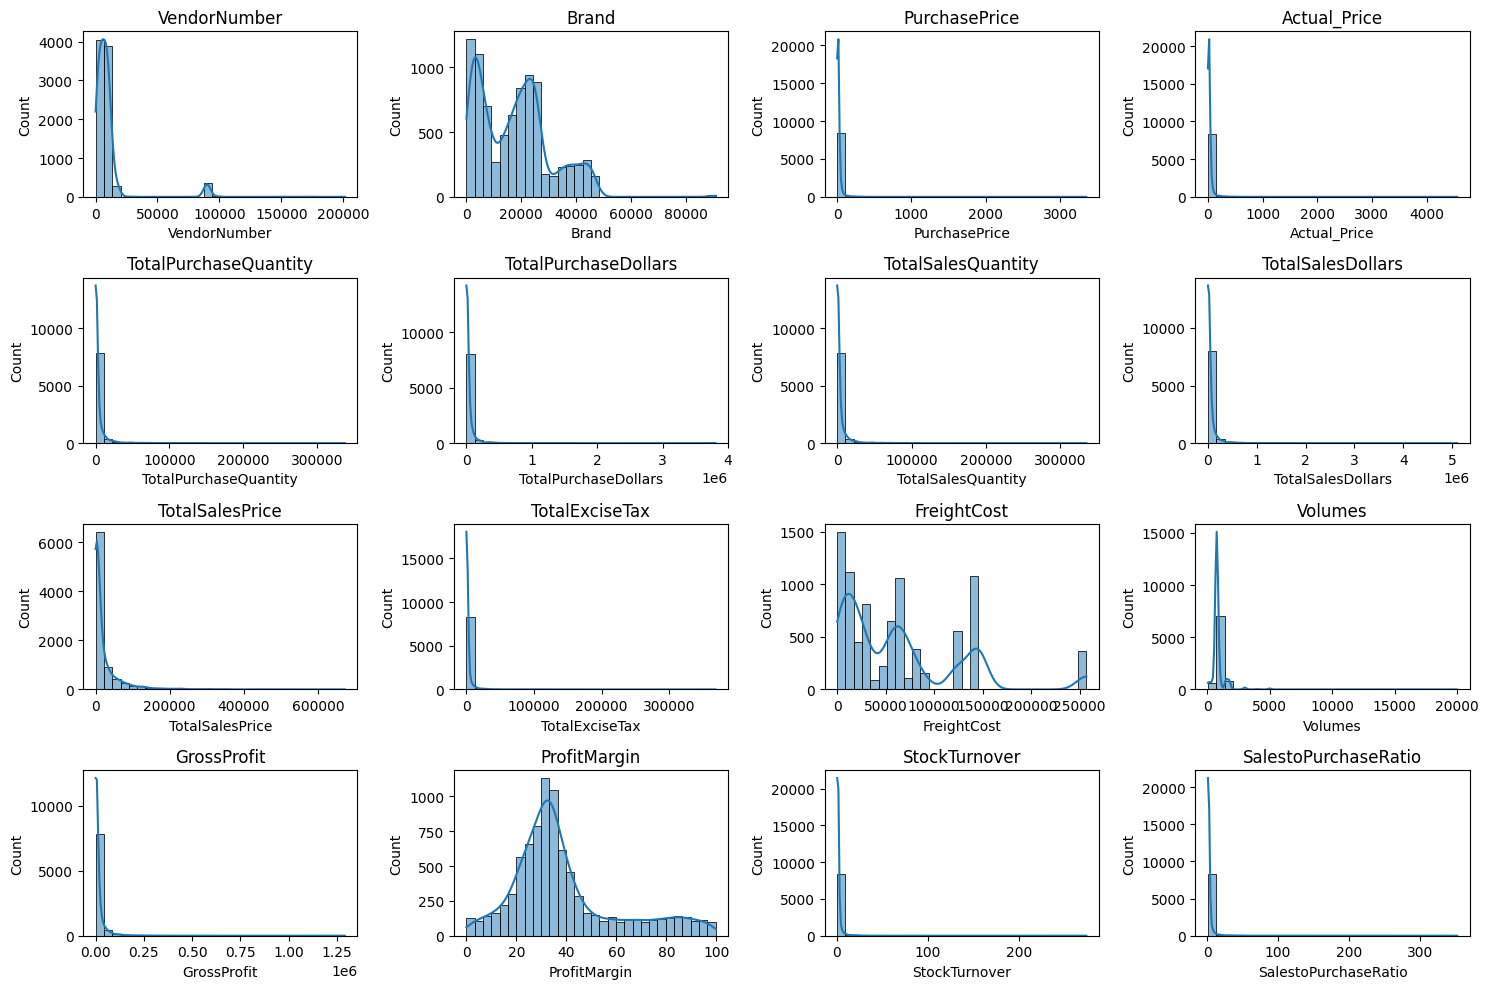

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
  plt.subplot(4,4,i+1)
  sns.histplot(df[col], kde=True, bins=30)
  plt.title(col)
plt.tight_layout()
plt.show()

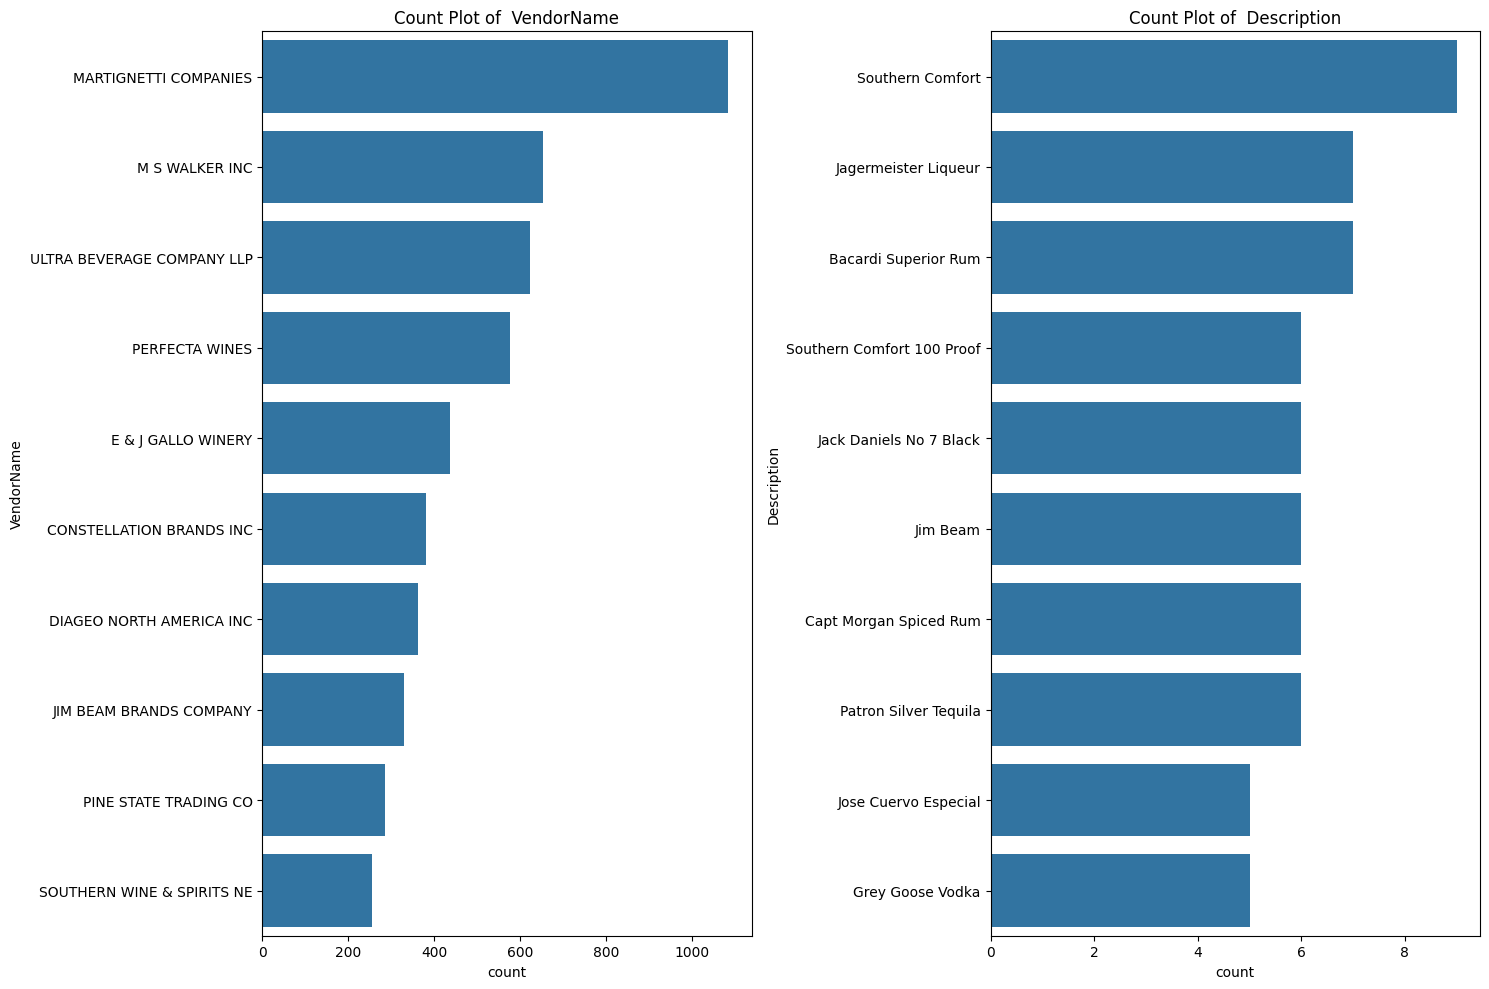

In [ ]:
categorical_cols = ["VendorName", "Description"]
plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_cols):
  plt.subplot(1,2,i+1)
  sns.countplot(df[col], order=df[col].value_counts().index[:10])
  plt.title(f'Count Plot of  {col}')
plt.tight_layout()
plt.show()

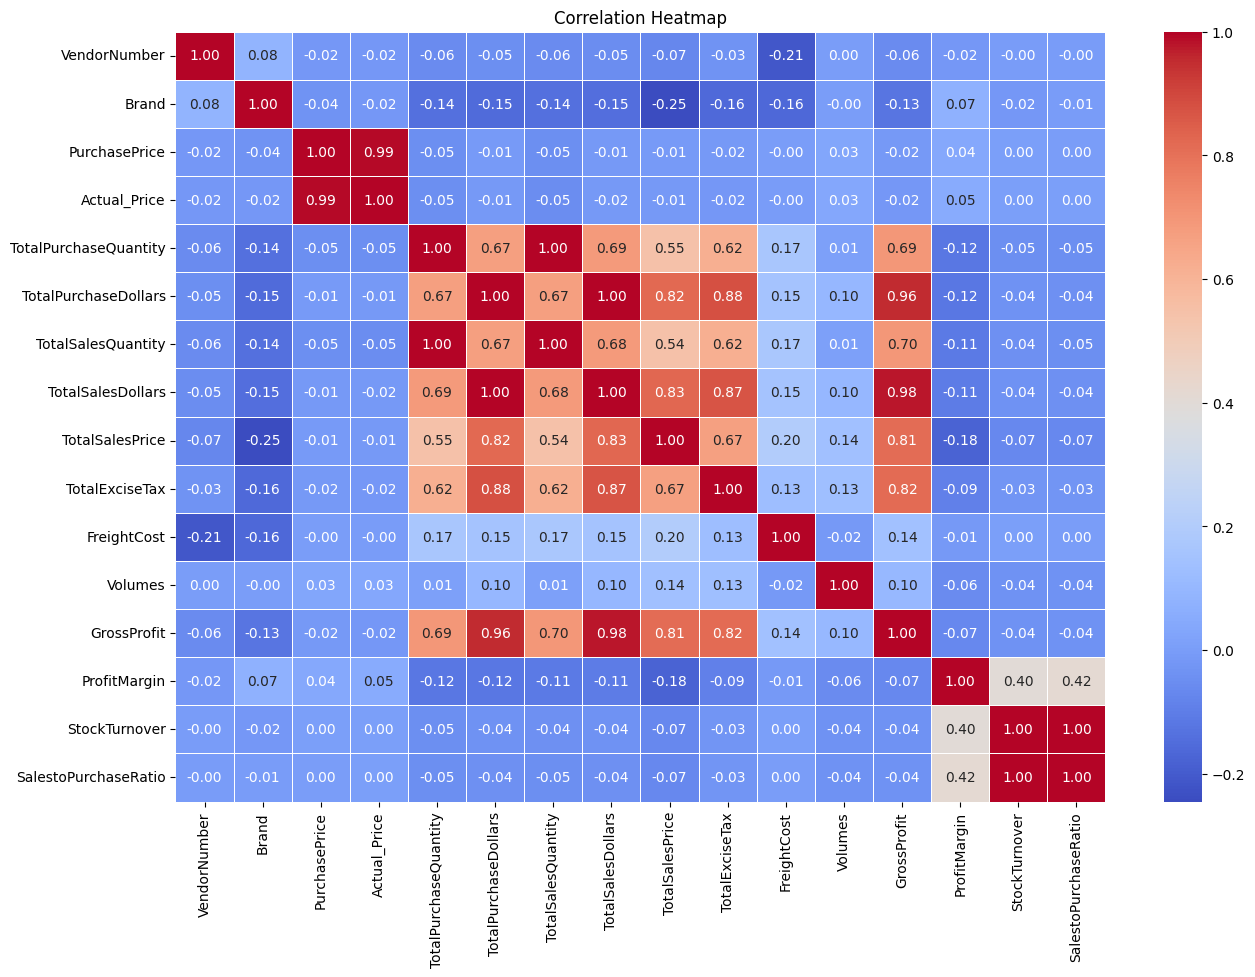

In [ ]:
plt.figure(figsize=(15,10))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Correlation analysis points

### Data Analysis

### Identify brands that needs Promotional or Pricing adjustments which exhibit lower sales performance but higher profit margins

In [ ]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'
}).reset_index()


In [ ]:
low_sales_threshold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_performance['ProfitMargin'].quantile(0.85)

In [ ]:
print(f'Low Sales Threshold: {low_sales_threshold}')
print(f'High Margin Threshold: {high_margin_threshold}')

Low Sales Threshold: 560.299
High Margin Threshold: 64.97017552750111


In [ ]:
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with low Sales but High Profit Margin")
print(target_brands.sort_values('TotalSalesDollars'))

Brands with low Sales but High Profit Margin
                       Description  TotalSalesDollars  ProfitMargin
6199    Santa Rita Organic Svgn Bl               9.99     66.466466
2369             Debauchery Pnt Nr              11.58     65.975820
2070   Concannon Glen Ellen Wh Zin              15.95     83.448276
2188             Crown Royal Apple              27.86     89.806174
6237  Sauza Sprklg Wild Berry Marg              27.96     82.153076
...                            ...                ...           ...
5074   Nanbu Bijin Southern Beauty             535.68     76.747312
2271         Dad's Hat Rye Whiskey             538.89     81.851584
57       A Bichot Clos Marechaudes             539.94     67.740860
6245     Sbragia Home Ranch Merlot             549.75     66.444748
3326     Goulee Cos d'Estournel 10             558.87     69.434752

[198 rows x 3 columns]


In [ ]:
brand_performance=brand_performance[brand_performance['TotalSalesDollars']<1000]

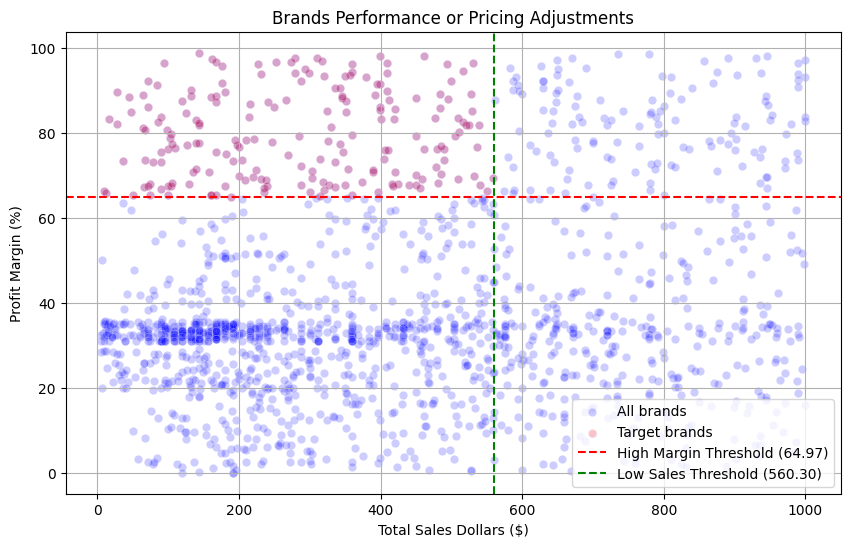

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All brands", alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target brands", alpha=0.2)


plt.axhline(y=high_margin_threshold, color='red', linestyle='--', label=f'High Margin Threshold ({high_margin_threshold:.2f})')
plt.axvline(x=low_sales_threshold, color='green', linestyle='--', label=f'Low Sales Threshold ({low_sales_threshold:.2f})')

plt.xlabel('Total Sales Dollars ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Brands Performance or Pricing Adjustments')
plt.legend()
plt.grid(True)
plt.show()

##### Which vendors and brands demonstrate the highest sales performance

In [ ]:
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands= df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
top_vendors

,TotalSalesDollars
VendorName,
DIAGEO NORTH AMERICA INC,6.799010e+07
MARTIGNETTI COMPANIES,3.933036e+07
PERNOD RICARD USA,3.206320e+07
JIM BEAM BRANDS COMPANY,3.142302e+07
BACARDI USA INC,2.485482e+07
CONSTELLATION BRANDS INC,2.421875e+07
E & J GALLO WINERY,1.839990e+07
BROWN-FORMAN CORP,1.824723e+07
ULTRA BEVERAGE COMPANY LLP,1.650254e+07


In [ ]:
top_brands

,TotalSalesDollars
Description,
Jack Daniels No 7 Black,7964746.76
Tito's Handmade Vodka,7399657.58
Grey Goose Vodka,7209608.06
Capt Morgan Spiced Rum,6356320.62
Absolut 80 Proof,6244752.03
Jameson Irish Whiskey,5715759.69
Ketel One Vodka,5070083.56
Baileys Irish Cream,4150122.07
Kahlua,3604858.66


In [ ]:
def format_dollars(value):
  if value >= 1_000_000:
    return f"{value / 1_000_000:.2f}M"
  elif value >= 1000:
    return f"{value / 1000:.2f}K"
  else:
    return str(value)

In [ ]:
top_brands.apply(lambda x: format_dollars(x))

,TotalSalesDollars
Description,
Jack Daniels No 7 Black,7.96M
Tito's Handmade Vodka,7.40M
Grey Goose Vodka,7.21M
Capt Morgan Spiced Rum,6.36M
Absolut 80 Proof,6.24M
Jameson Irish Whiskey,5.72M
Ketel One Vodka,5.07M
Baileys Irish Cream,4.15M
Kahlua,3.60M


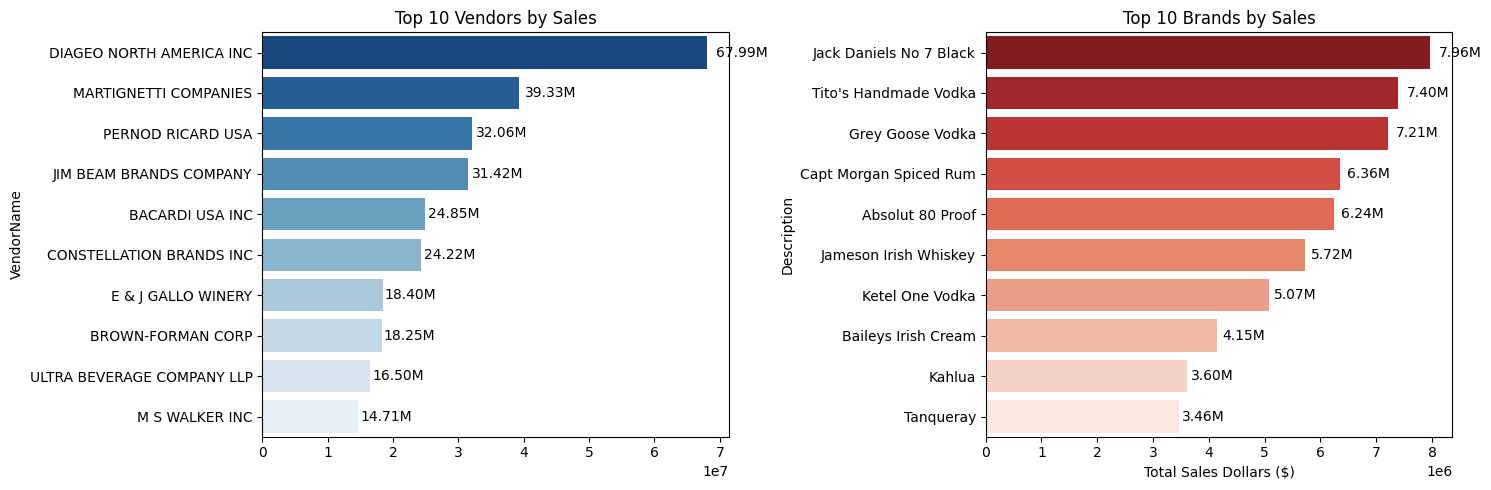

In [ ]:
plt.figure(figsize=(15,5))
#Plot for Top Vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(x=top_vendors.values, y=top_vendors.index, palette='Blues_r')
plt.title('Top 10 Vendors by Sales')

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width()*0.02), bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',fontsize=10, color='black', va='center')

plt.subplot(1,2,2)
ax2 = sns.barplot(x=top_brands.values, y=top_brands.index.astype(str), palette='Reds_r')
plt.title('Top 10 Brands by Sales')
plt.xlabel('Total Sales Dollars ($)')

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width()*0.02), bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',fontsize=10, color='black', va='center')
plt.tight_layout()
plt.show()


#### Which vendors contribute the most total purchase dollars?

In [ ]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars':  'sum'
}).reset_index()

In [ ]:
total_vendors=vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars':  'sum'
}).reset_index().shape[0]
total_vendors

119

In [ ]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [ ]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%', ascending=False),2)

In [ ]:
# Display top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(lambda x: format_dollars(x))
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(lambda x: format_dollars(x))
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(lambda x: format_dollars(x))
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [ ]:
top_vendors['PurchaseContribution%'].sum()

np.float64(65.69000000000001)

In [ ]:
top_vendors["Cummulative_Contribution"] = top_vendors["PurchaseContribution%"].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cummulative_Contribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


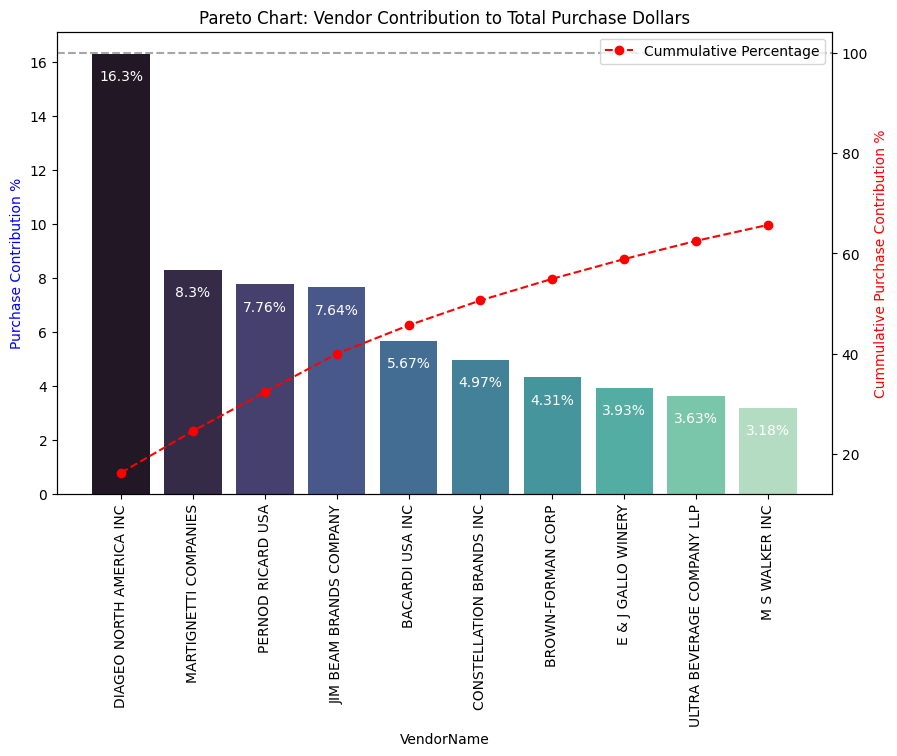

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))
#Bar plot for purchase Contribution
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette='mako', ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
  ax1.text(i, value-1,str(value)+'%', ha='center', fontsize=10, color='white')

ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cummulative_Contribution'], color='red', marker='o', linestyle='dashed', label='Cummulative Percentage')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cummulative Purchase Contribution %', color='red')
ax1.set_title('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchase Dollars')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')
plt.show()







#### How much total procurement is dependent on the top vendors?

In [ ]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(), 2)}%")


Total Purchase Contribution of top 10 vendors is 65.69%


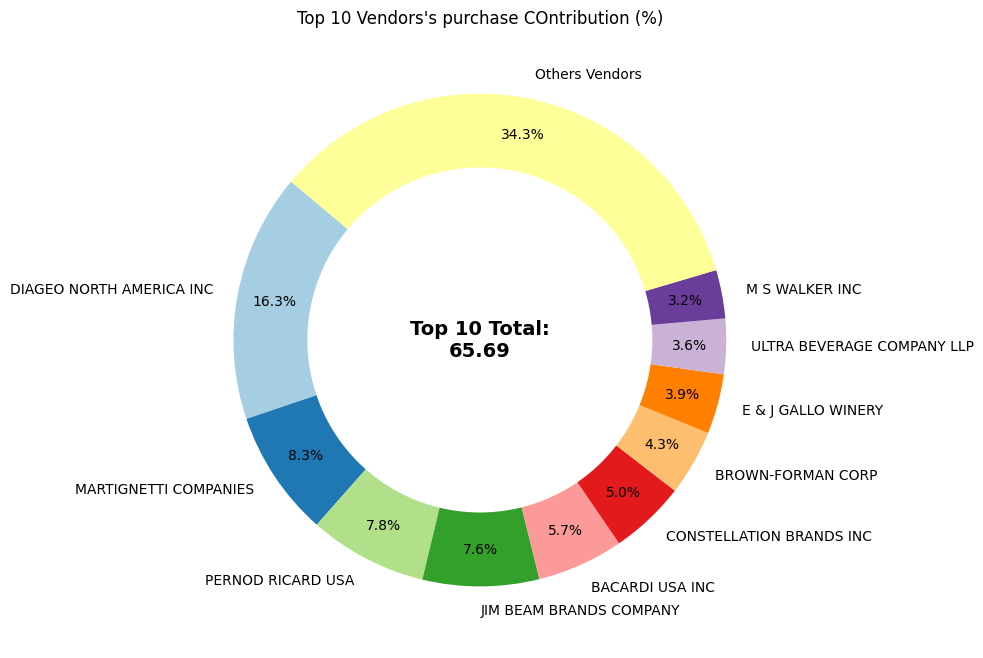

In [ ]:
vendors=list(top_vendors['VendorName'].values)
purchase_contribution=list(top_vendors['PurchaseContribution%'].values)
total_contribution=sum(purchase_contribution)
remaining_contribution=100-total_contribution

# Append others contribtion
vendors.append('Others Vendors')
purchase_contribution.append(remaining_contribution)

fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contribution, labels=vendors, autopct='%1.1f%%', startangle=140, pctdistance=0.85,
                                  colors=plt.cm.Paired.colors)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
plt.text(0,0, f"Top 10 Total:\n{total_contribution:.2f}", fontsize=14, fontweight='bold', ha='center', va='center')
plt.title("Top 10 Vendors's purchase COntribution (%)")
plt.show()


####  Does purchasing in bulk reduce the unit price and what is the optimal purchase volume for cost savings?

In [ ]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [ ]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,Volumes,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,145080,3811251.60,142049,5.101920e+06,672819.31,260999.20,68601.68,1750.0,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,164038,3804041.22,160247,4.819073e+06,561512.37,294438.66,144929.24,1750.0,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,187407,3418303.68,187140,4.538121e+06,461140.15,343854.07,123780.22,1750.0,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,201682,3261197.94,200412,4.475973e+06,420050.01,368242.80,257032.07,1750.0,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,138109,3023206.01,135838,4.223108e+06,545778.28,249587.83,257032.07,1750.0,1199901.61,28.412764,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,2,2.64,5,1.595000e+01,10.96,0.55,27100.41,750.0,13.31,83.448276,2.500000,6.041667,1.32
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,6,2.34,134,6.566000e+01,1.47,7.04,50293.62,50.0,63.32,96.436186,22.333333,28.059829,0.39
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,2,1.48,2,1.980000e+00,0.99,0.10,14069.87,50.0,0.50,25.252525,1.000000,1.337838,0.74
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,1,1.47,72,1.432800e+02,77.61,15.12,257032.07,200.0,141.81,98.974037,72.000000,97.469388,1.47


In [ ]:
df['OrderSize'] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

In [ ]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.057543
Medium,15.486414
Large,10.777625


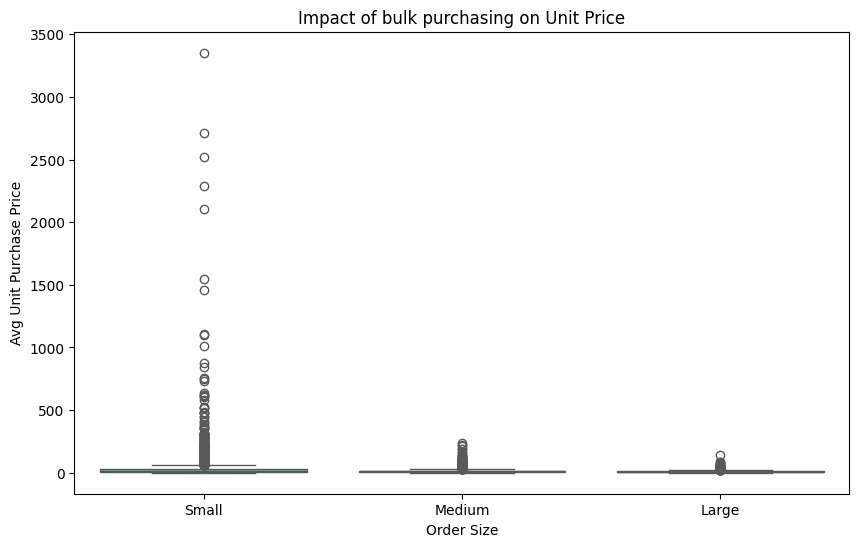

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='OrderSize' ,y='UnitPurchasePrice', palette='Set2')
plt.title('Impact of bulk purchasing on Unit Price')
plt.xlabel('Order Size')
plt.ylabel('Avg Unit Purchase Price')
plt.show()

## vendors

### Which vendors have low inventory turnover, indication excess stock and slow-moving products?

In [ ]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [ ]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity'] )* df['PurchasePrice']
print('Total Unsold Capital: ', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital:  2.71M


In [ ]:
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()
inventory_value_per_vendor = inventory_value_per_vendor.sort_values('UnsoldInventoryValue', ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(lambda x: format_dollars(x))

inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


### What is the 95% confidence intervals for profit margins of topperforming and low-performing vendors.

In [ ]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
bottom_threshold = df['TotalSalesDollars'].quantile(0.05)

In [ ]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
bottom_vendors = df[df['TotalSalesDollars'] <= bottom_threshold]['ProfitMargin'].dropna()

In [ ]:
print(f"Top Vendors Confidence Interval: {stats.t.interval(0.95, len(top_vendors)-1, loc=np.mean(top_vendors), scale=stats.sem(top_vendors))}")

Top Vendors Confidence Interval: (np.float64(30.73645577842142), np.float64(31.60802947997332))


In [ ]:
def confidence_level(data, confidence=0.95):
  n = len(data)
  mean = np.mean(data)
  std_dev = np.std(data, ddof=1)/np.sqrt(len(data))
  t_critical = stats.t.ppf((1+confidence)/2, df=len(data)-1)
  margin_of_error = t_critical * std_dev
  confidence_interval = (mean - margin_of_error, mean + margin_of_error)
  return confidence_interval

In [ ]:
top_confidence_interval = confidence_level(top_vendors)
bottom_confidence_interval = confidence_level(bottom_vendors)

print()